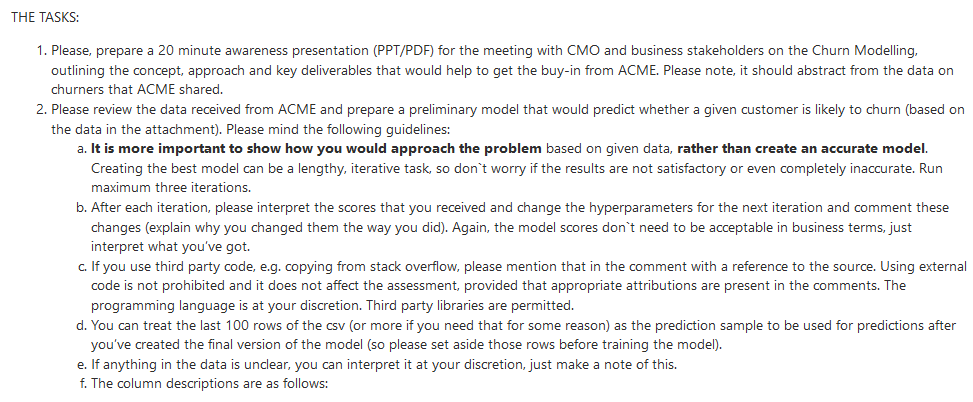
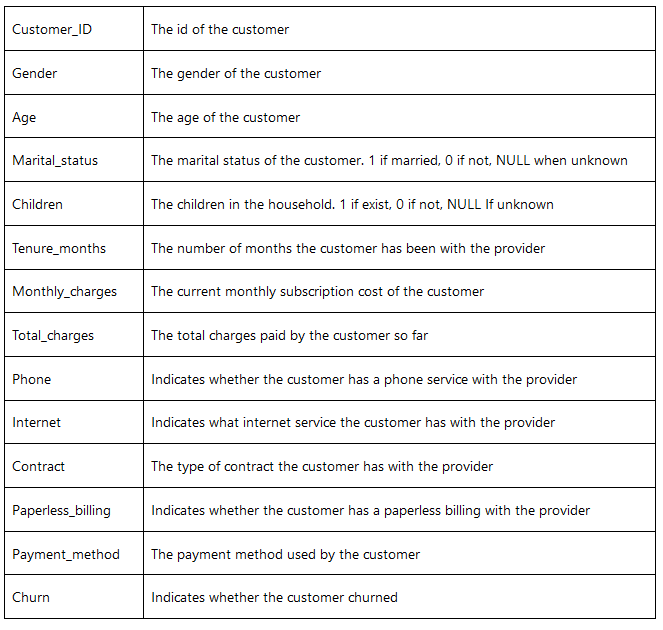

## Load and cleaning dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe=pd.read_csv("Churn.csv") # loading csv file with data

In [3]:
df=dataframe.copy() # create copy od dataframe, if I make mistake I can simply restore dataset
df.head()

,Customer_ID,Gender,Age,Marital_status,Children,Tenure_months,Monthly_charges,Total_charges,Phone,Internet,Contract,Paperless_billing,Payment_method,Churn
0,1,Female,50,1.0,NaN,8,94.20,777.3,Yes,Fiber,Monthly,Yes,Electronic check,Yes
1,2,Male,70,1.0,NaN,24,78.85,1772.25,Yes,Fiber,Monthly,Yes,Electronic check,Yes
2,3,Male,73,NaN,NaN,47,20.05,951.55,Yes,No,Yearly,No,Mailed check,No
3,4,Male,37,NaN,NaN,17,93.85,1625.65,Yes,Fiber,Monthly,No,Electronic check,Yes
4,5,Female,71,NaN,1.0,32,79.50,2665,Yes,Fiber,Monthly,Yes,Electronic check,No


In [4]:
df.dtypes

Customer_ID            int64
Gender                object
Age                    int64
Marital_status       float64
Children             float64
Tenure_months          int64
Monthly_charges      float64
Total_charges         object
Phone                 object
Internet              object
Contract              object
Paperless_billing     object
Payment_method        object
Churn                 object
dtype: object

In [5]:
df.isnull().sum(axis = 0) # here I check how many NaN values are in dataset

Customer_ID             0
Gender                  0
Age                     0
Marital_status       3154
Children             3140
Tenure_months           0
Monthly_charges         0
Total_charges           0
Phone                   0
Internet                0
Contract                0
Paperless_billing       0
Payment_method          0
Churn                   0
dtype: int64

In [6]:
def clean(df): #function that replace most of parameters to binary values
    df['Children'].replace([1,0,np.NaN],['Yes','No','Unknown'],inplace=True)
    df['Marital_status'].replace([1,0,np.NaN],['Married','Not_married','Unknown'],inplace=True)
    df["Phone"].replace(["Yes",'No'],[1,0],inplace=True)
    df['Gender'].replace(["Male",'Female'],[1,0],inplace=True)
    df["Paperless_billing"].replace(["Yes",'No'],[1,0],inplace=True)
    df["Churn"].replace(["Yes",'No'],[1,0],inplace=True)
    df_churn=df.pop('Churn') # here are remove from df Churn column and later I moved it as the last column
    df_dummy=pd.get_dummies(df[['Children','Marital_status','Internet','Contract','Payment_method']],dtype=np.int64) # features with multi-type of value are transform in OneHotEncoder
    df.drop(['Children','Marital_status','Internet','Contract','Payment_method'],axis=1,inplace=True) # here I drop columns that where change line above
    df = pd.concat([df,df_dummy,df_churn],axis=1) 
    df['Total_charges']=df['Total_charges'].astype(np.float64)
    return df

In [7]:
#For few customers there is no record of "Total charges"
lista_empty_charges = df[df["Total_charges"] == ' '].index
lista_empty_charges

Int64Index([248, 920, 2453, 3307, 3664, 4424, 4739, 5066, 5542, 6096, 6658], dtype='int64')

In [8]:
# I assume that these customer do not pay yet his first monthly charge, therefore Ill add to total charge a value equal to monthly charge
for customer in lista_empty_charges:
    df.at[customer,"Total_charges"]=df.at[customer,"Monthly_charges"]

In [9]:
df = clean(df)
df.head()

,Customer_ID,Gender,Age,Tenure_months,Monthly_charges,Total_charges,Phone,Paperless_billing,Children_No,Children_Unknown,...,Internet_Fiber,Internet_No,Contract_Biyearly,Contract_Monthly,Contract_Yearly,Payment_method_Bank transfer (automatic),Payment_method_Credit card (automatic),Payment_method_Electronic check,Payment_method_Mailed check,Churn
0,1,0,50,8,94.20,777.30,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,2,1,70,24,78.85,1772.25,1,1,0,1,...,1,0,0,1,0,0,0,1,0,1
2,3,1,73,47,20.05,951.55,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,4,1,37,17,93.85,1625.65,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
4,5,0,71,32,79.50,2665.00,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [10]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Tenure_months', 'Monthly_charges',
       'Total_charges', 'Phone', 'Paperless_billing', 'Children_No',
       'Children_Unknown', 'Children_Yes', 'Marital_status_Married',
       'Marital_status_Not_married', 'Marital_status_Unknown', 'Internet_DSL',
       'Internet_Fiber', 'Internet_No', 'Contract_Biyearly',
       'Contract_Monthly', 'Contract_Yearly',
       'Payment_method_Bank transfer (automatic)',
       'Payment_method_Credit card (automatic)',
       'Payment_method_Electronic check', 'Payment_method_Mailed check',
       'Churn'],
      dtype='object')

### By doing cleaning from 13 features we increase number up to 24. This can cause to create overcomplicatet model, which can results with bad ML model.
### To solve this I will use feature selection method to distinguish the most import features

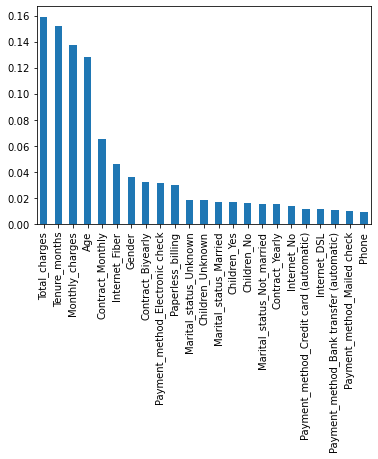

In [11]:
X=df.loc[:,"Gender":"Payment_method_Mailed check"] # here I exluded from feature customer_ID column. I think this information is irrelevant 
Y=df["Churn"]

# Here I used Tree-based feature selection model https://scikit-learn.org/stable/modules/feature_selection.html
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

# Part of code comes from https://www.analyticsvidhya.com/blog/2021/04/discovering-the-shades-of-feature-selection-methods/?fbclid=IwAR0btHXt_cMeEuqXxujSYF4BZf47XvJyh-ohu4JcImFcZivXXnOzot5mP7o
feat_importances = pd.Series(model.feature_importances_, index=X.columns, name="Importance")
feat_importances.nlargest(23).plot.bar()
plt.show()

# From bar chart we can see that first 4 parameter have much higher importance than rest of features. Thats why I will choose those 5 feature to create ML models.
df_imp=pd.DataFrame(feat_importances).sort_values(by="Importance", ascending=False)[:10]
lista= df_imp.index # Here I take names of important features

In [12]:
X[lista].head()

,Total_charges,Tenure_months,Monthly_charges,Age,Contract_Monthly,Internet_Fiber,Gender,Contract_Biyearly,Payment_method_Electronic check,Paperless_billing
0,777.30,8,94.20,50,1,1,0,0,1,1
1,1772.25,24,78.85,70,1,1,1,0,1,1
2,951.55,47,20.05,73,0,0,1,0,0,0
3,1625.65,17,93.85,37,1,1,1,0,1,0
4,2665.00,32,79.50,71,1,1,0,0,1,1


#### To Divie dataset into train and test data I will use train test split method. 

In [13]:
from sklearn.model_selection import train_test_split #split dataset into train and test data
#test_size gives little bit higher number of rows than is wrote in task.
x_train, x_test, y_train, y_test = train_test_split(X[lista], Y, test_size=0.02, shuffle=True, stratify=df["Churn"])

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (6902, 10) (6902,)
Test set: (141, 10) (141,)


#### Please note that during splitting i use shuffle and by using stratify I presereved class proportions, which is diffrent than what task say. However in my opinion, by doing these two stpes I can get more model will work better

#### To evalute model I will use sklearn.metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def results(y_test, y_pred):
    print(classification_report(y_test, y_pred))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

## Logistic regresion

In [15]:
from sklearn.linear_model import LogisticRegression #ML model 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       104
           1       0.66      0.51      0.58        37

    accuracy                           0.80       141
   macro avg       0.75      0.71      0.72       141
weighted avg       0.79      0.80      0.79       141



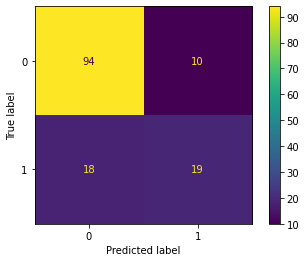

In [16]:
LR = LogisticRegression(max_iter=500) # creation of Logistic model
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
results(y_test, y_pred)

### Model above was made by not tuning any hypeparameters, just to show how it looks before and after hypeparameters adjusting.
### The first row is for customers whose actual churn value in the test set is 0 ("No") so called TRUE NEGATIVE value. The second row is for customers whose actual churn value in the test set is 1 ("Yes") so called TRUE POSITIVE. Out of 141 customers, 112 cases was predicted correctly. Nevertheless for churn value 1 ("Yes") out from 37 cases only 16 was predicted correctly and 21 were predicted as false positive values, which is not good.

# Next step is to indroduce to ML model a scaler that can scale data before feeding model

In [17]:
from sklearn.preprocessing import StandardScaler #I will use only standardScaler becouse for shallow ML I think its suits better 
from sklearn.pipeline import Pipeline

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.62      0.49      0.55        37

    accuracy                           0.79       141
   macro avg       0.73      0.69      0.70       141
weighted avg       0.78      0.79      0.78       141



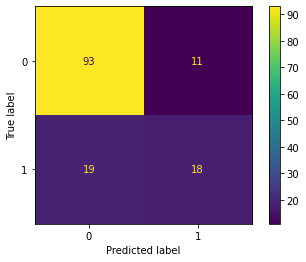

In [18]:
pipe_LR = Pipeline([("scaler", StandardScaler()),
    ("model", LogisticRegression())]) # I need to create pipeline to pass scaler to estimator

pipe_LR.fit(x_train, y_train)
y_pred_pipe=pipe_LR.predict(x_test)

results(y_test, y_pred_pipe)

## Same results as before

# Hyperparameters tuning. Here I will use GridsearchCV to find best parameters.

### I will change class weight, regularization strength (C) and solver.

### Please note that, on default GridsearchCV will fit to have best accuraccy score, here Ill change that to precision, recall and f1 scores

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer #make_scorer allows me to pass new score method into scoring parameter

In [22]:
pipe_LR = Pipeline([("scaler", StandardScaler()),
    ("model", LogisticRegression())]) #As before I need to create pipeline to pass scaler to estimator and then pass it to gridsearch

parameters_LR = {
            'model__max_iter':[300], # according to task I should use 3 iterations, but I want to prevent fail to converge.
            'model__class_weight':[{0: 1, 1: i} for i in np.arange(1,10)],  
            'model__C':np.linspace(0.01,0.2,20)}
model_LR = GridSearchCV(estimator=pipe_LR,
                   param_grid=parameters_LR,
                   cv=5, #prevent model to overfiting
                   scoring={"precision":make_scorer(precision_score),"recall":make_scorer(recall_score), "f1score":make_scorer(f1_score)}, #I pass to GridsearchCV new parameters that he need to look at.
                   refit="recall", # I tell gridserach to fit thata to get the best recall
                   n_jobs=-1)

model_LR.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ]),
                         'model__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                                 {0: 1, 1: 3}, {0: 1, 1: 4},
                                                 {0: 1, 1: 5}, {0: 1, 1: 6},
                                                 {0: 1, 1: 7}, {0: 1, 1: 8},
                                                 {0: 1, 1: 9}],
                         'model__max_iter': [300]},
             refit='recall',
             scoring={'f1score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [26]:
# Here I transform GridSearch results to DataFrame and show only best fit
df_results_LR=pd.DataFrame(model_LR.cv_results_)
df_results_LR.sort_values(by = ["rank_test_recall"]).head(1) #best recall score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__max_iter,params,split0_test_precision,split1_test_precision,...,std_test_recall,rank_test_recall,split0_test_f1score,split1_test_f1score,split2_test_f1score,split3_test_f1score,split4_test_f1score,mean_test_f1score,std_test_f1score,rank_test_f1score
17,0.019417,0.002247,0.008209,0.000983,0.02,"{0: 1, 1: 9}",300,"{'model__C': 0.02, 'model__class_weight': {0: ...",0.392449,0.385699,...,0.013731,1,0.55278,0.551938,0.5568,0.564143,0.554662,0.556065,0.004372,171


In [27]:
df_results_LR.sort_values(by = ["rank_test_precision"]).head(1) #best precision score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__max_iter,params,split0_test_precision,split1_test_precision,...,std_test_recall,rank_test_recall,split0_test_f1score,split1_test_f1score,split2_test_f1score,split3_test_f1score,split4_test_f1score,mean_test_f1score,std_test_f1score,rank_test_f1score
0,0.020019,0.001097,0.009209,0.001472,0.01,"{0: 1, 1: 1}",300,"{'model__C': 0.01, 'model__class_weight': {0: ...",0.655431,0.656357,...,0.032532,180,0.55205,0.580547,0.582946,0.535885,0.513732,0.553032,0.026425,180


In [28]:
df_results_LR.sort_values(by = ["rank_test_f1score"]).head(1) #best f1_score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__max_iter,params,split0_test_precision,split1_test_precision,...,std_test_recall,rank_test_recall,split0_test_f1score,split1_test_f1score,split2_test_f1score,split3_test_f1score,split4_test_f1score,mean_test_f1score,std_test_f1score,rank_test_f1score
136,0.02022,0.002042,0.008206,0.000399,0.16,"{0: 1, 1: 2}",300,"{'model__C': 0.16, 'model__class_weight': {0: ...",0.555556,0.552783,...,0.034754,141,0.627962,0.648649,0.63258,0.622754,0.590476,0.624484,0.019085,1


In [19]:
#pipe_LR.get_params().keys() #just to check adjustable parameters for gridsearchcv

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.61      0.54      0.57        37

    accuracy                           0.79       141
   macro avg       0.72      0.71      0.71       141
weighted avg       0.78      0.79      0.78       141



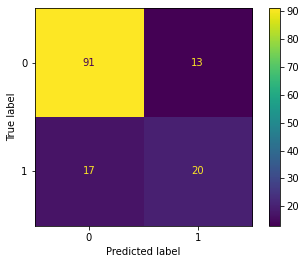

In [83]:
# This cell shows results if would like to fit model to get best precision score
pipe_precision = Pipeline([("scaler", StandardScaler()),
    ("model", LogisticRegression(C=0.01,max_iter=300))])

pipe_precision.fit(x_train,y_train)
y_pred_precision=pipe_precision.predict(x_test)

results(y_test, y_pred_precision)

### If we fit model to have high precision score, we slightly decrease prediciton of cases with churn 1.

              precision    recall  f1-score   support

           0       0.96      0.44      0.61       104
           1       0.38      0.95      0.54        37

    accuracy                           0.57       141
   macro avg       0.67      0.69      0.57       141
weighted avg       0.81      0.57      0.59       141



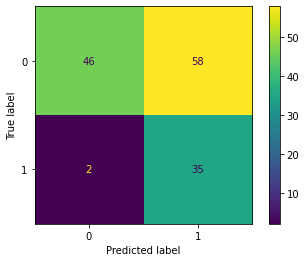

In [84]:
# Model LR for fiting to get best recall score
pipe_recall = Pipeline([("scaler", StandardScaler()),
    ("model", LogisticRegression(C=0.01,max_iter=300, class_weight={0: 1, 1: 9}))])

pipe_recall.fit(x_train,y_train)
y_pred_recall=pipe_recall.predict(x_test)

results(y_test, y_pred_recall)

#### Due to fitting to recall score, model very well works to recognize cases with churn 1. However, downside of model is that he get high value of false positive value, but in my opinion its better to recognize more than truly is than do not recognize at all.

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       104
           1       0.57      0.70      0.63        37

    accuracy                           0.78       141
   macro avg       0.72      0.76      0.74       141
weighted avg       0.80      0.78      0.79       141



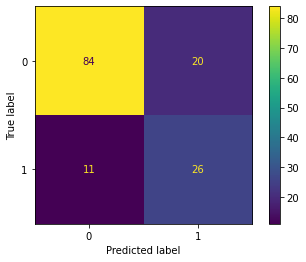

In [29]:
# Model LR for fiting to get best f1 score
pipe_f1 = Pipeline([("scaler", StandardScaler()),
    ("model", LogisticRegression(C=0.16,max_iter=300, class_weight={0: 1, 1: 2}))])

pipe_f1.fit(x_train,y_train)
y_pred_f1=pipe_f1.predict(x_test)

results(y_test, y_pred_f1)

### Due to fitting to f1 score (wchich balance recall and precision score) we get fairly good model. We increased number of churn cases, but with no huge increased with predicted false positive cases. This is for now best model  

# Decision tree

### Besides LogisticRegression classifier I also check others classifiers.

In [32]:
from sklearn.tree import DecisionTreeClassifier


In [33]:
pipe_DT = Pipeline([("scaler", StandardScaler()), #same as before I only will use StandardScaler
    ("model", DecisionTreeClassifier())])

parameters = {
            'model__class_weight':[{0: 1, 1: i} for i in np.arange(1,10)], 
            'model__criterion': ["entropy"],
            'model__max_depth':np.arange(2,10),
            'model__random_state': np.arange(0,10)}
model_DT = GridSearchCV(estimator=pipe_DT,
                   param_grid=parameters,
                   cv=5,
                   scoring={"f1score":make_scorer(f1_score),"recall":make_scorer(recall_score)},
                   refit="f1score",
                   n_jobs=-1)

model_DT.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                                 {0: 1, 1: 3}, {0: 1, 1: 4},
                                                 {0: 1, 1: 5}, {0: 1, 1: 6},
                                                 {0: 1, 1: 7}, {0: 1, 1: 8},
                                                 {0: 1, 1: 9}],
                         'model__criterion': ['entropy'],
                         'model__max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             refit='f1score',
             scoring={'f1score': make_scorer(f1_score),
                      'recall': make_scorer(recall_score)})

In [30]:
#pipe_DT.get_params().keys() # same as before, line is just to check available options

In [34]:
df_results_DT=pd.DataFrame(model_DT.cv_results_)
df_results_DT.sort_values(by = ["rank_test_recall"]).head(1) # best recall

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__random_state,params,split0_test_f1score,...,std_test_f1score,rank_test_f1score,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
670,0.022619,0.002247,0.005206,0.000401,"{0: 1, 1: 9}",entropy,5,0,"{'model__class_weight': {0: 1, 1: 9}, 'model__...",0.536623,...,0.008953,621,0.948229,0.967302,0.959016,0.939891,0.931694,0.949226,0.012792,1


In [36]:
df_results_DT.sort_values(by = ["rank_test_f1score"]).head(1) # best f1 score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__random_state,params,split0_test_f1score,...,std_test_f1score,rank_test_f1score,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
119,0.022219,0.0004,0.005005,0.000633,"{0: 1, 1: 2}",entropy,5,9,"{'model__class_weight': {0: 1, 1: 2}, 'model__...",0.623436,...,0.014287,1,0.746594,0.765668,0.73224,0.715847,0.740437,0.740157,0.016407,571


              precision    recall  f1-score   support

           0       0.95      0.52      0.67       104
           1       0.40      0.92      0.56        37

    accuracy                           0.62       141
   macro avg       0.68      0.72      0.62       141
weighted avg       0.80      0.62      0.64       141



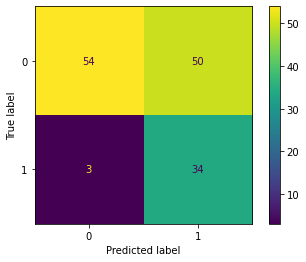

In [35]:
pipe_DT = Pipeline([("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(criterion='entropy',max_depth=5, class_weight={0: 1, 1: 9},random_state=0))])

pipe_DT.fit(x_train,y_train)
y_pred_DT=pipe_DT.predict(x_test)
results(y_test, y_pred_DT)

### Here If I will fit to get best precision or accuracy I will get the same result as results in previous model with high precision. For recall fit, If I allow tree depth to be smaller than 2 I get all cases predicted as Churn =1, which is not good. Overall I get here more false positive than in logistic regrioson model

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       104
           1       0.57      0.78      0.66        37

    accuracy                           0.79       141
   macro avg       0.74      0.79      0.75       141
weighted avg       0.82      0.79      0.80       141



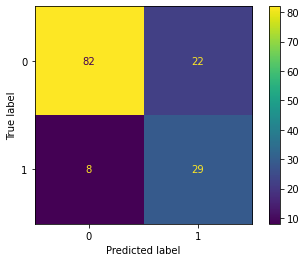

In [37]:
pipe_DT_f1 = Pipeline([("scaler", StandardScaler()),
    ("model", DecisionTreeClassifier(criterion='entropy',max_depth=5, class_weight={0: 1, 1: 2},random_state=9))])

pipe_DT_f1.fit(x_train,y_train)
y_pred_DT_f1=pipe_DT_f1.predict(x_test)
results(y_test, y_pred_DT_f1)

## Between LogisticRegression and DecisionTree, the second show the best results

# Other models that could be tested : RandomForestClassifier(), Naive Bayes methods or neural network (this require much higher volume of dataset)